In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.impute import KNNImputer
from itertools import product

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
imp = KNNImputer(n_neighbors=7)

In [148]:
c=pd.read_csv('/content/drive/MyDrive/Capstone Myntra Project/Import Data/Customer.csv')
p=pd.read_csv('/content/drive/MyDrive/Capstone Myntra Project/Import Data/Products.csv')
o=pd.read_csv('/content/drive/MyDrive/Capstone Myntra Project/Import Data/Orders.csv')
rt=pd.read_csv('/content/drive/MyDrive/Capstone Myntra Project/Import Data/Ratings.csv')
dv=pd.read_csv('/content/drive/MyDrive/Capstone Myntra Project/Import Data/Delivery.csv')
rr=pd.read_csv('/content/drive/MyDrive/Capstone Myntra Project/Import Data/Returns_refund.csv')
tr=pd.read_csv('/content/drive/MyDrive/Capstone Myntra Project/Import Data/Transactions.csv')


In [149]:
# Shape of each Data
print('Customer:',c.shape)
print('Product:',p.shape)
print('Orders:',o.shape)
print('Ratings:',rt.shape)
print('Delivery:',dv.shape)
print('Return Refund:',rr.shape)
print('Transaction:',tr.shape)

Customer: (10184, 8)
Product: (10000, 6)
Orders: (10000, 9)
Ratings: (10000, 4)
Delivery: (5, 4)
Return Refund: (2000, 5)
Transaction: (10000, 4)


## Data Preprocessing

### Handle Null Values

In [150]:
tr.isnull().sum()
tr['Transaction_Mode']=tr['Transaction_Mode'].fillna(tr['Transaction_Mode'].mode()[0])

In [151]:
rr.isnull().sum()

,0
RT_ID,0
Or_ID,0
Reason,0
Return/Refund,0
Date,0


In [152]:
dv.isnull().sum()
dv.dropna(inplace=True)

In [153]:
rt.isnull().sum()
clm=['Prod_Rating','Delivery/Service_Rating']
for i in clm:
    rt[i]=imp.fit_transform(rt[[i]])

In [154]:
o.isnull().sum()
o['Coupon']=o['Coupon'].fillna('No Coupon')
o['Discount']=o['Discount'].fillna(0)

In [155]:
p.isnull().sum()

,0
P_ID,0
P_Name,0
Category,0
Company Name,0
Gender,0
Price,0


In [156]:
c.isnull().sum()

,0
C_ID,0
C_Name,0
Gender,0
Age,0
City,0
State,0
Street Address,0
Mobile,0


## Handle Duplicate Values

In [157]:
tr.duplicated().sum()

np.int64(0)

In [158]:
rr.duplicated().sum()

np.int64(0)

In [159]:
dv.duplicated().sum()

np.int64(0)

In [160]:
rt.duplicated().sum()

np.int64(0)

In [161]:
o.duplicated().sum()

np.int64(0)

In [162]:
p.duplicated().sum()

np.int64(0)

In [163]:
c.duplicated().sum()
c.drop_duplicates(inplace=True)

## Change Datatype

In [164]:
o['Order_Date']=pd.to_datetime(o['Order_Date'],format="%d-%m-%Y")
o['Order_Time']=pd.to_datetime(o['Order_Time'])

In [165]:
rr['Date']=pd.to_datetime(rr['Date'],format="%d-%m-%Y")

In [166]:
p.rename(columns={'Gender':'P_Gender'},inplace=True )

## Select the necessary columns in the table


In [167]:
# Customer
c_clm=['C_ID','Age','State','City']
c_fl=c[c_clm]
c_fl.shape

(10000, 4)

In [168]:
# Product
p_clm=['P_ID','P_Name','Price','Category','Company Name','P_Gender']
p_fl=p[p_clm]
p_fl.shape

(10000, 6)

In [169]:
# Orders
o_clm=['Or_ID','C_ID','P_ID','DP_ID','Qty','Coupon','Discount','Order_Date','Order_Time']
o_fl=o[o_clm]
o_fl['Year']=o_fl['Order_Date'].dt.year
o_fl['Month']=o_fl['Order_Date'].dt.month_name()
o_fl['Day']=o_fl['Order_Date'].dt.day_name()
o_fl['Hour']=o_fl['Order_Time'].dt.hour
o_fl=o_fl.drop(['Order_Date','Order_Time'],axis=1)
o_fl.shape

(10000, 11)

In [170]:
# Delivery
dv_clm=['DP_ID','DP_name','Percent_Cut']
dv_fl=dv[dv_clm]
dv_fl.shape

(5, 3)

In [171]:
# Ratings
rt_clm=['Or_ID','Prod_Rating','Delivery/Service_Rating']
rt_fl=rt[rt_clm]
rt_fl.shape

(10000, 3)

In [172]:
# Transaction
tr_clm=['Or_ID']
tr_fl=tr[tr_clm]
tr_fl.shape

(10000, 1)

In [173]:
# Return_Refund
rr_clm=['RT_ID','Or_ID','Return/Refund']
rr_fl=rr[rr_clm]
rr_fl.shape

(2000, 3)

## Join Tables

In [174]:
# Joining Orders and Customer Table

po=pd.merge(o_fl,c_fl,on='C_ID',how='left')
po.shape

(10000, 14)

In [175]:
# Joining PO and Rating Table

pc=pd.merge(po,rt_fl,on='Or_ID',how='left')
pc.shape

(13693, 16)

In [176]:
# Joining PT and Delivery Table

ptd=pd.merge(pc,dv_fl,on='DP_ID',how='left')
ptd.shape

(13693, 18)

In [177]:
# Joining PTD and Return Table

prr=pd.merge(ptd,rr_fl,on='Or_ID',how='left')
prr.shape

(13951, 20)

In [178]:
# Joining PC and Transaction Table

pt=pd.merge(prr,tr_fl,on='Or_ID',how='left')
pt.shape

(19167, 20)

In [179]:
pt.dtypes

,0
Or_ID,object
C_ID,object
P_ID,object
DP_ID,object
Qty,int64
Coupon,object
Discount,float64
Year,int32
Month,object
Day,object


In [180]:
pt.columns

Index(['Or_ID', 'C_ID', 'P_ID', 'DP_ID', 'Qty', 'Coupon', 'Discount', 'Year',
       'Month', 'Day', 'Hour', 'Age', 'State', 'City', 'Prod_Rating',
       'Delivery/Service_Rating', 'DP_name', 'Percent_Cut', 'RT_ID',
       'Return/Refund'],
      dtype='object')

In [181]:
agg_ord=pt.groupby(['P_ID']).agg({
    'Or_ID':'count',
    'DP_name':lambda x: x.mode()[0],
    'RT_ID':'count',
    'Qty':'median',
    'Discount':'median',
    'Age':'median',
    'Year':lambda x: round(x.mode()[0]) ,
    'Month':lambda x: x.mode()[0],
    'Day':lambda x: x.mode()[0],
    'Hour':'median',
    'City':lambda x: x.mode()[0],
    'Prod_Rating':'median',
    'Delivery/Service_Rating':'median',
    'Percent_Cut':'mean'
}).reset_index()

In [182]:
fl_t=pd.merge(p_fl,agg_ord,on='P_ID',how='left')

In [183]:
fl_t.head(2)

,P_ID,P_Name,Price,Category,Company Name,P_Gender,Or_ID,DP_name,RT_ID,Qty,Discount,Age,Year,Month,Day,Hour,City,Prod_Rating,Delivery/Service_Rating,Percent_Cut
0,PD_21000001,Distressed Stretch Denim Charcoal Faded Jeans,332.77,Jeans,Puma,Unisex,4.0,Blue Dart,0.0,3.0,5.0,56.0,2023.0,August,Sunday,11.0,Delhi,NaN,NaN,25.0
1,PD_21000002,Straight Leg Cotton Blend Light Blue Faded Jeans,225.24,Jeans,Gap,Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Overall Table

In [184]:
df=pd.DataFrame(fl_t)
df.shape

(10000, 20)

In [185]:
df.head(2)

,P_ID,P_Name,Price,Category,Company Name,P_Gender,Or_ID,DP_name,RT_ID,Qty,Discount,Age,Year,Month,Day,Hour,City,Prod_Rating,Delivery/Service_Rating,Percent_Cut
0,PD_21000001,Distressed Stretch Denim Charcoal Faded Jeans,332.77,Jeans,Puma,Unisex,4.0,Blue Dart,0.0,3.0,5.0,56.0,2023.0,August,Sunday,11.0,Delhi,NaN,NaN,25.0
1,PD_21000002,Straight Leg Cotton Blend Light Blue Faded Jeans,225.24,Jeans,Gap,Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

### Change column names

In [186]:
df.columns

Index(['P_ID', 'P_Name', 'Price', 'Category', 'Company Name', 'P_Gender',
       'Or_ID', 'DP_name', 'RT_ID', 'Qty', 'Discount', 'Age', 'Year', 'Month',
       'Day', 'Hour', 'City', 'Prod_Rating', 'Delivery/Service_Rating',
       'Percent_Cut'],
      dtype='object')

In [187]:
df.columns = ['P_ID', 'P_Name', 'Price', 'Category', 'Company Name', 'P_Gender',
              'Total_Customer','Delivery_Partner','Total_Return_Refund',
       'Qty', 'Discount',  'Age', 'Year', 'Month', 'Day', 'Hour',
       'City', 'Prod_Rating', 'Delivery/Service_Rating', 'Percent_Cut']

In [188]:
df.columns

Index(['P_ID', 'P_Name', 'Price', 'Category', 'Company Name', 'P_Gender',
       'Total_Customer', 'Delivery_Partner', 'Total_Return_Refund', 'Qty',
       'Discount', 'Age', 'Year', 'Month', 'Day', 'Hour', 'City',
       'Prod_Rating', 'Delivery/Service_Rating', 'Percent_Cut'],
      dtype='object')

### Handle Null Value

In [189]:
def null_val(df):
  n=df.isna().sum()
  nl=n[n>0].sort_values(ascending=False).reset_index()
  nl.columns=['Fet','Val']
  nl['Dtype']=[df[i].dtypes for i in nl['Fet']]
  nl['% Null']=round(nl['Val']/df.shape[0]*100,5)

  return nl


In [190]:
nvl=null_val(df)
nvl

,Fet,Val,Dtype,% Null
0,Prod_Rating,5350,float64,53.50
1,Delivery/Service_Rating,5350,float64,53.50
2,Total_Return_Refund,3734,float64,37.34
3,Qty,3734,float64,37.34
4,Total_Customer,3734,float64,37.34
5,Delivery_Partner,3734,object,37.34
6,Age,3734,float64,37.34
7,Discount,3734,float64,37.34
8,Year,3734,float64,37.34
9,Month,3734,object,37.34


In [191]:
nm_cl= nvl[nvl['Dtype']!='object']['Fet'].tolist()
for i in nm_cl:
  df[i]=imp.fit_transform(df[[i]])


In [192]:
df['Delivery_Partner']=df['Delivery_Partner'].fillna('Other Partners')

In [193]:
df['City']=df['City'].fillna('Other Cities')

In [194]:
ct_cl=['Month','Day' ]

for i in ct_cl:
  df[i] = df[i].fillna(df[i].mode()[0])


In [195]:
null_val(df)

,Fet,Val,Dtype,% Null


### Handle Duplicate values

In [196]:
df.duplicated().sum()


np.int64(0)

### Feature Engineering

In [197]:
df['Hr_Prt']=np.where(df['Hour'].between(0,6),'Night',
                      np.where(df['Hour'].between(6,12),'Morning',
                      np.where(df['Hour'].between(12,17),'Afternoon','Evening')))

In [198]:
clm=['Total_Customer','Total_Return_Refund','Qty','Discount','Percent_Cut' ,'Age','Year','Hour' ]
for i in clm:
  df[i]=[ round(j) for j in df[i] ]

In [199]:
clm2=['Prod_Rating','Delivery/Service_Rating']
for i in clm2:
  df[i]=[ round(j,2) for j in df[i] ]

In [200]:
df.dtypes

,0
P_ID,object
P_Name,object
Price,float64
Category,object
Company Name,object
P_Gender,object
Total_Customer,int64
Delivery_Partner,object
Total_Return_Refund,int64
Qty,int64


In [201]:
df.columns.tolist()

['P_ID',
 'P_Name',
 'Price',
 'Category',
 'Company Name',
 'P_Gender',
 'Total_Customer',
 'Delivery_Partner',
 'Total_Return_Refund',
 'Qty',
 'Discount',
 'Age',
 'Year',
 'Month',
 'Day',
 'Hour',
 'City',
 'Prod_Rating',
 'Delivery/Service_Rating',
 'Percent_Cut',
 'Hr_Prt']

In [202]:
clm_f =  ['P_ID', 'P_Name',  'Category', 'Company Name', 'P_Gender', 'Total_Customer', 'Total_Return_Refund','Price', 'Qty', 'Discount', 'Age', 'Year',
      'Month', 'Day', 'Hour','City', 'Prod_Rating', 'Delivery/Service_Rating', 'Percent_Cut','Hr_Prt','Delivery_Partner']

df_f=df[clm_f]

In [203]:
df_f.to_csv('Myntra_Data.csv',index=False)

## EDA

In [204]:
df_f.columns

Index(['P_ID', 'P_Name', 'Category', 'Company Name', 'P_Gender',
       'Total_Customer', 'Total_Return_Refund', 'Price', 'Qty', 'Discount',
       'Age', 'Year', 'Month', 'Day', 'Hour', 'City', 'Prod_Rating',
       'Delivery/Service_Rating', 'Percent_Cut', 'Hr_Prt', 'Delivery_Partner'],
      dtype='object')

In [205]:
cat=['Category', 'Company Name','P_Gender', 'Delivery_Partner','City',
       'Month', 'Day', 'Hr_Prt']
cont=['Price', 'Total_Customer', 'Total_Return_Refund', 'Qty', 'Discount',
       'Age', 'Year', 'Hour',  'Prod_Rating',
       'Delivery/Service_Rating', 'Percent_Cut']

### Univariate - Continuous


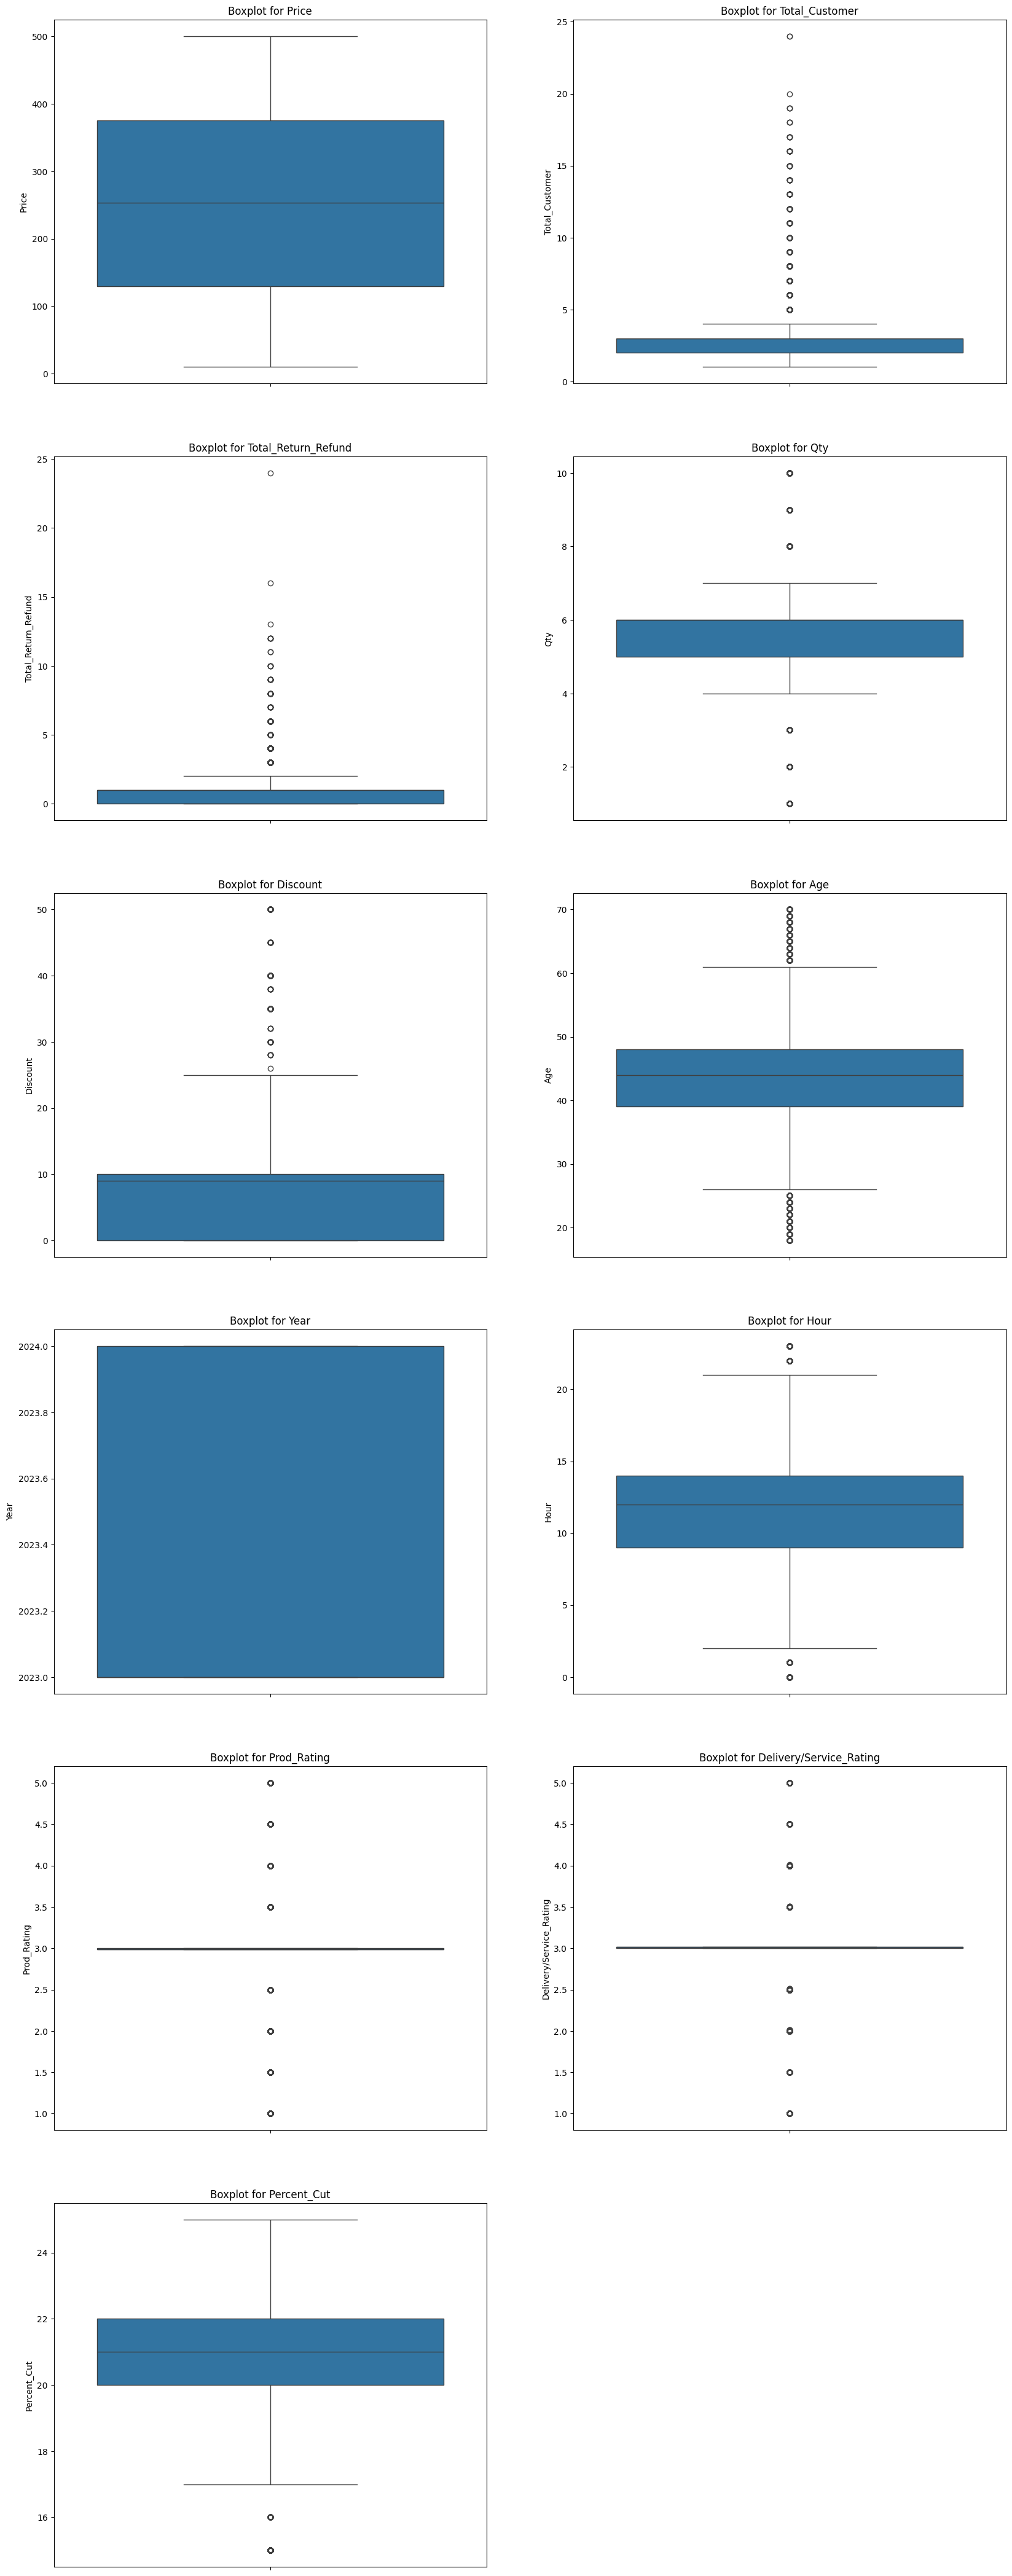

In [206]:
plt.figure(figsize=(20,100))

for i in range(len(cont)):
  plt.subplot(len(cont),2,i+1)
  sns.boxplot(df_f[cont[i]])
  plt.title(f'Boxplot for {cont[i]}')

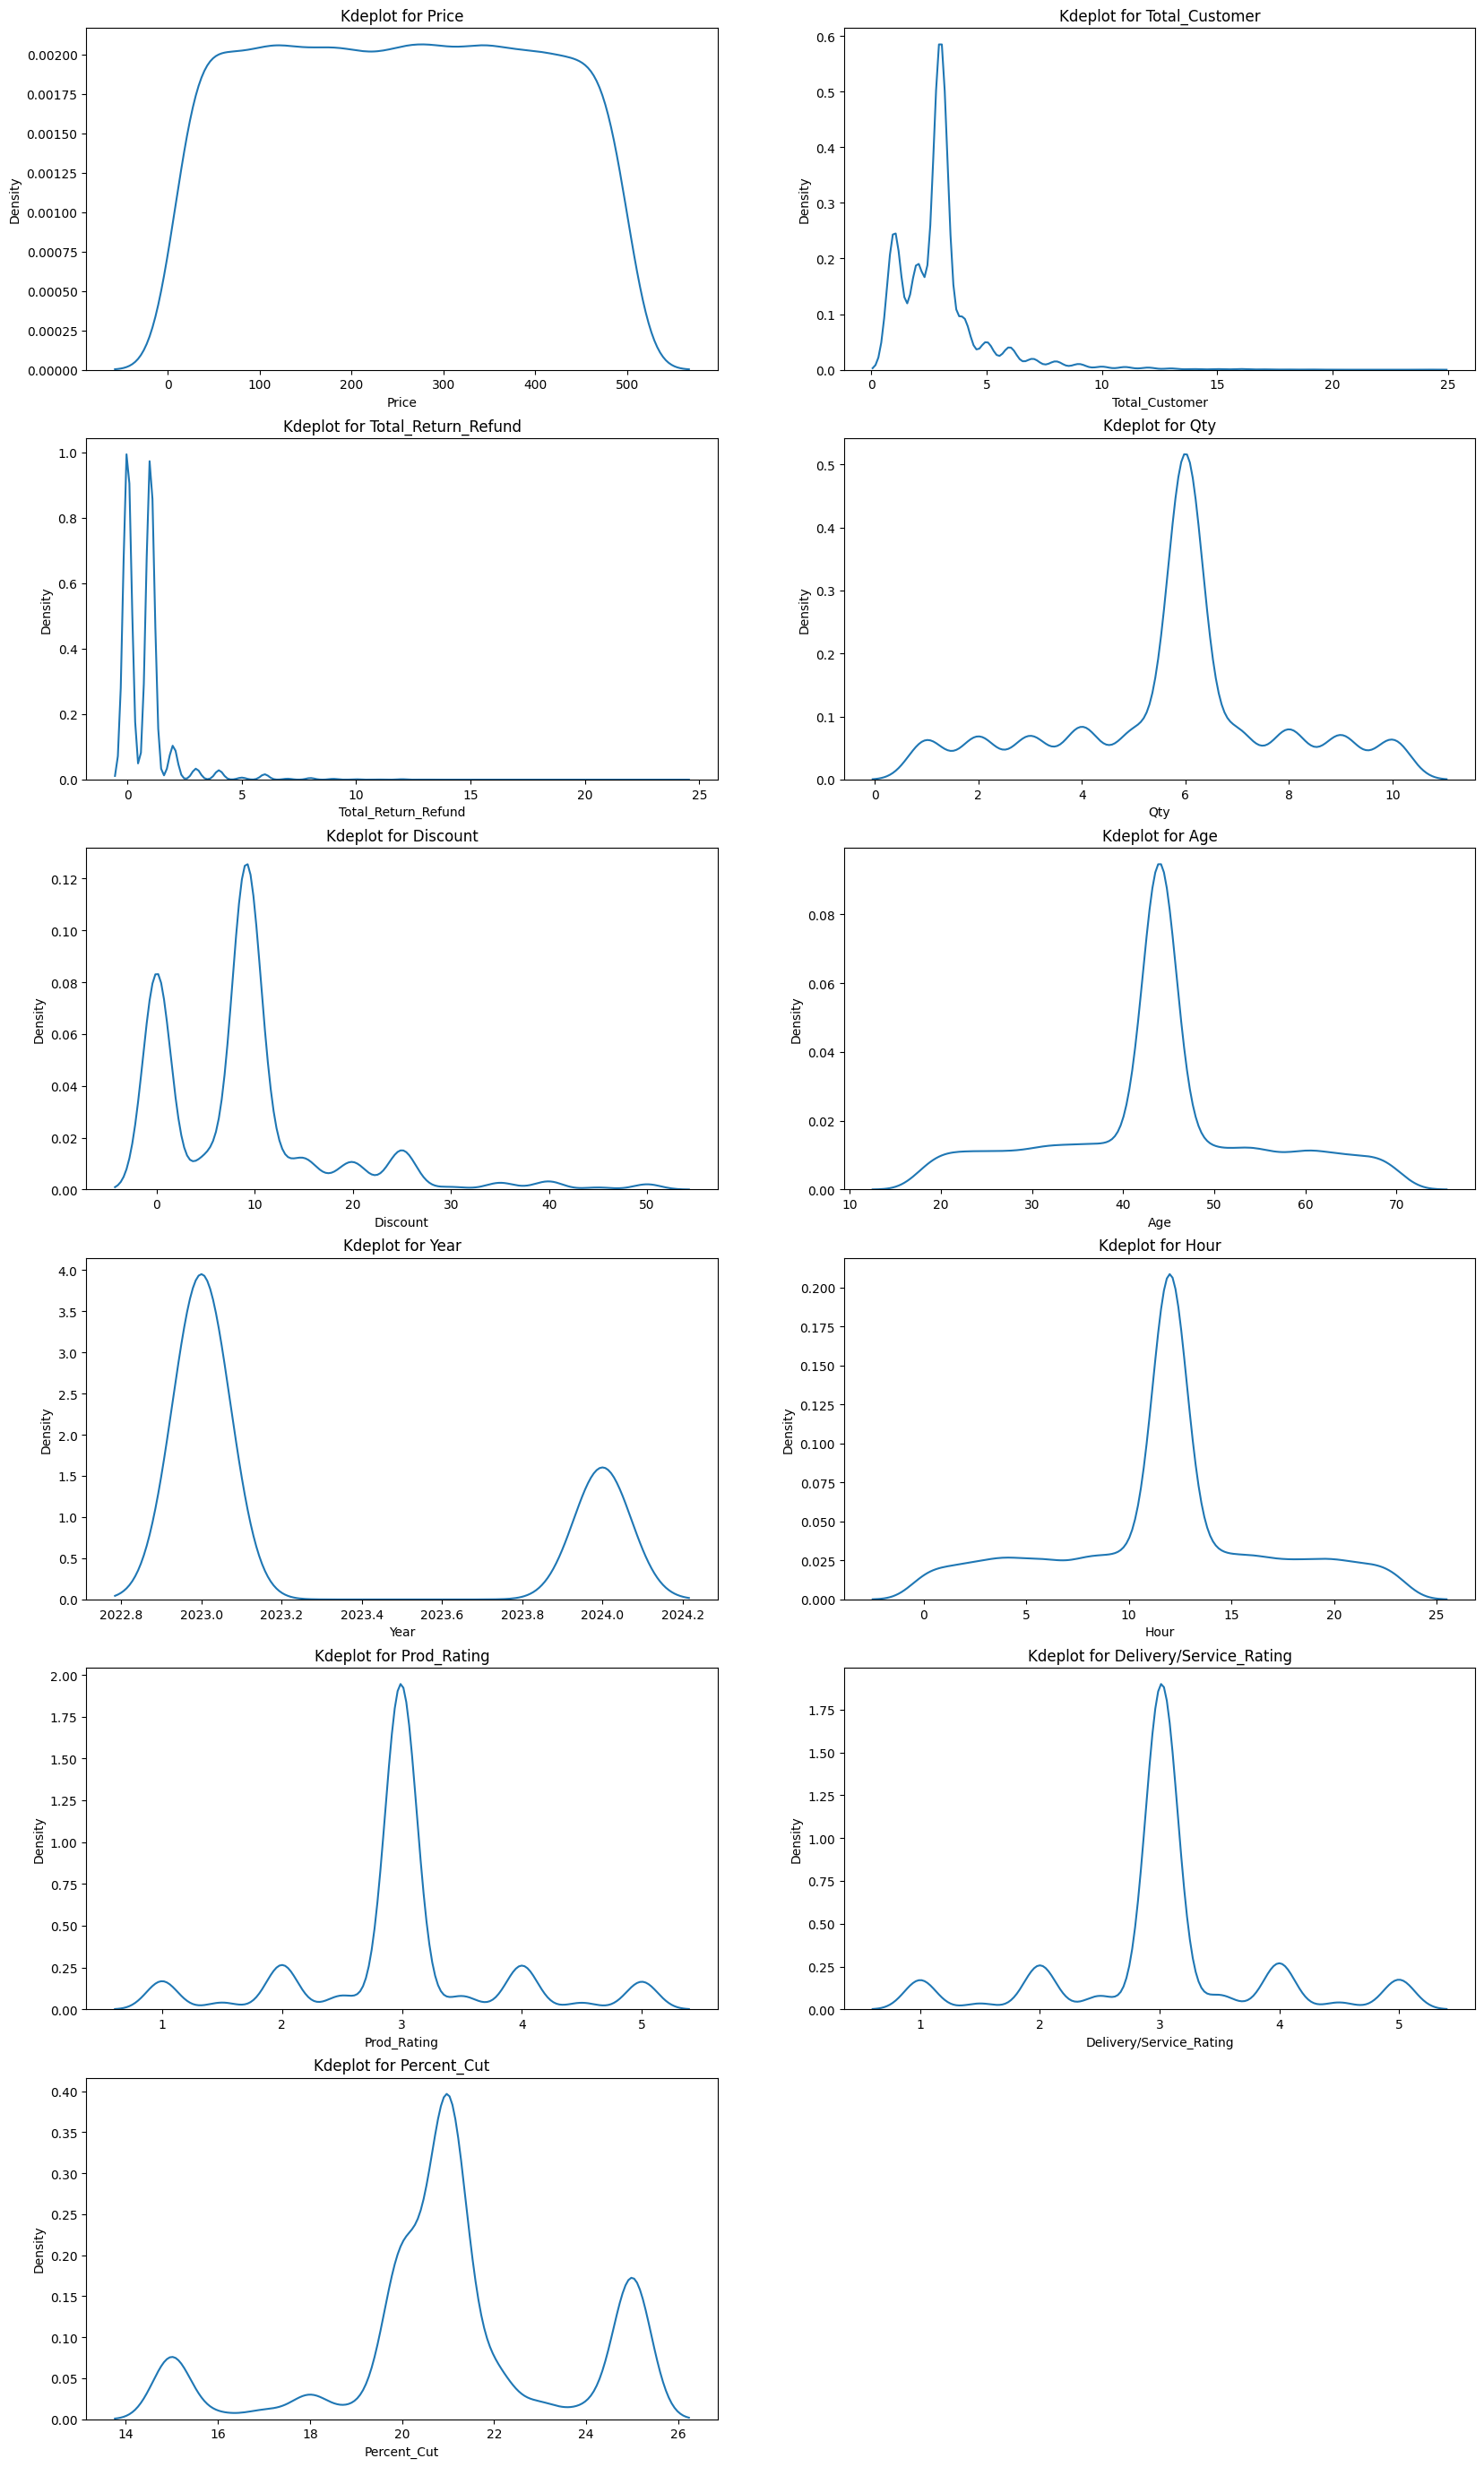

In [207]:
plt.figure(figsize=(20,100))

for i in range(len(cont)):
  plt.subplot(17,2,i+1)
  sns.kdeplot(df_f[cont[i]])
  plt.title(f'Kdeplot for {cont[i]}')

### Univariate - Categorical

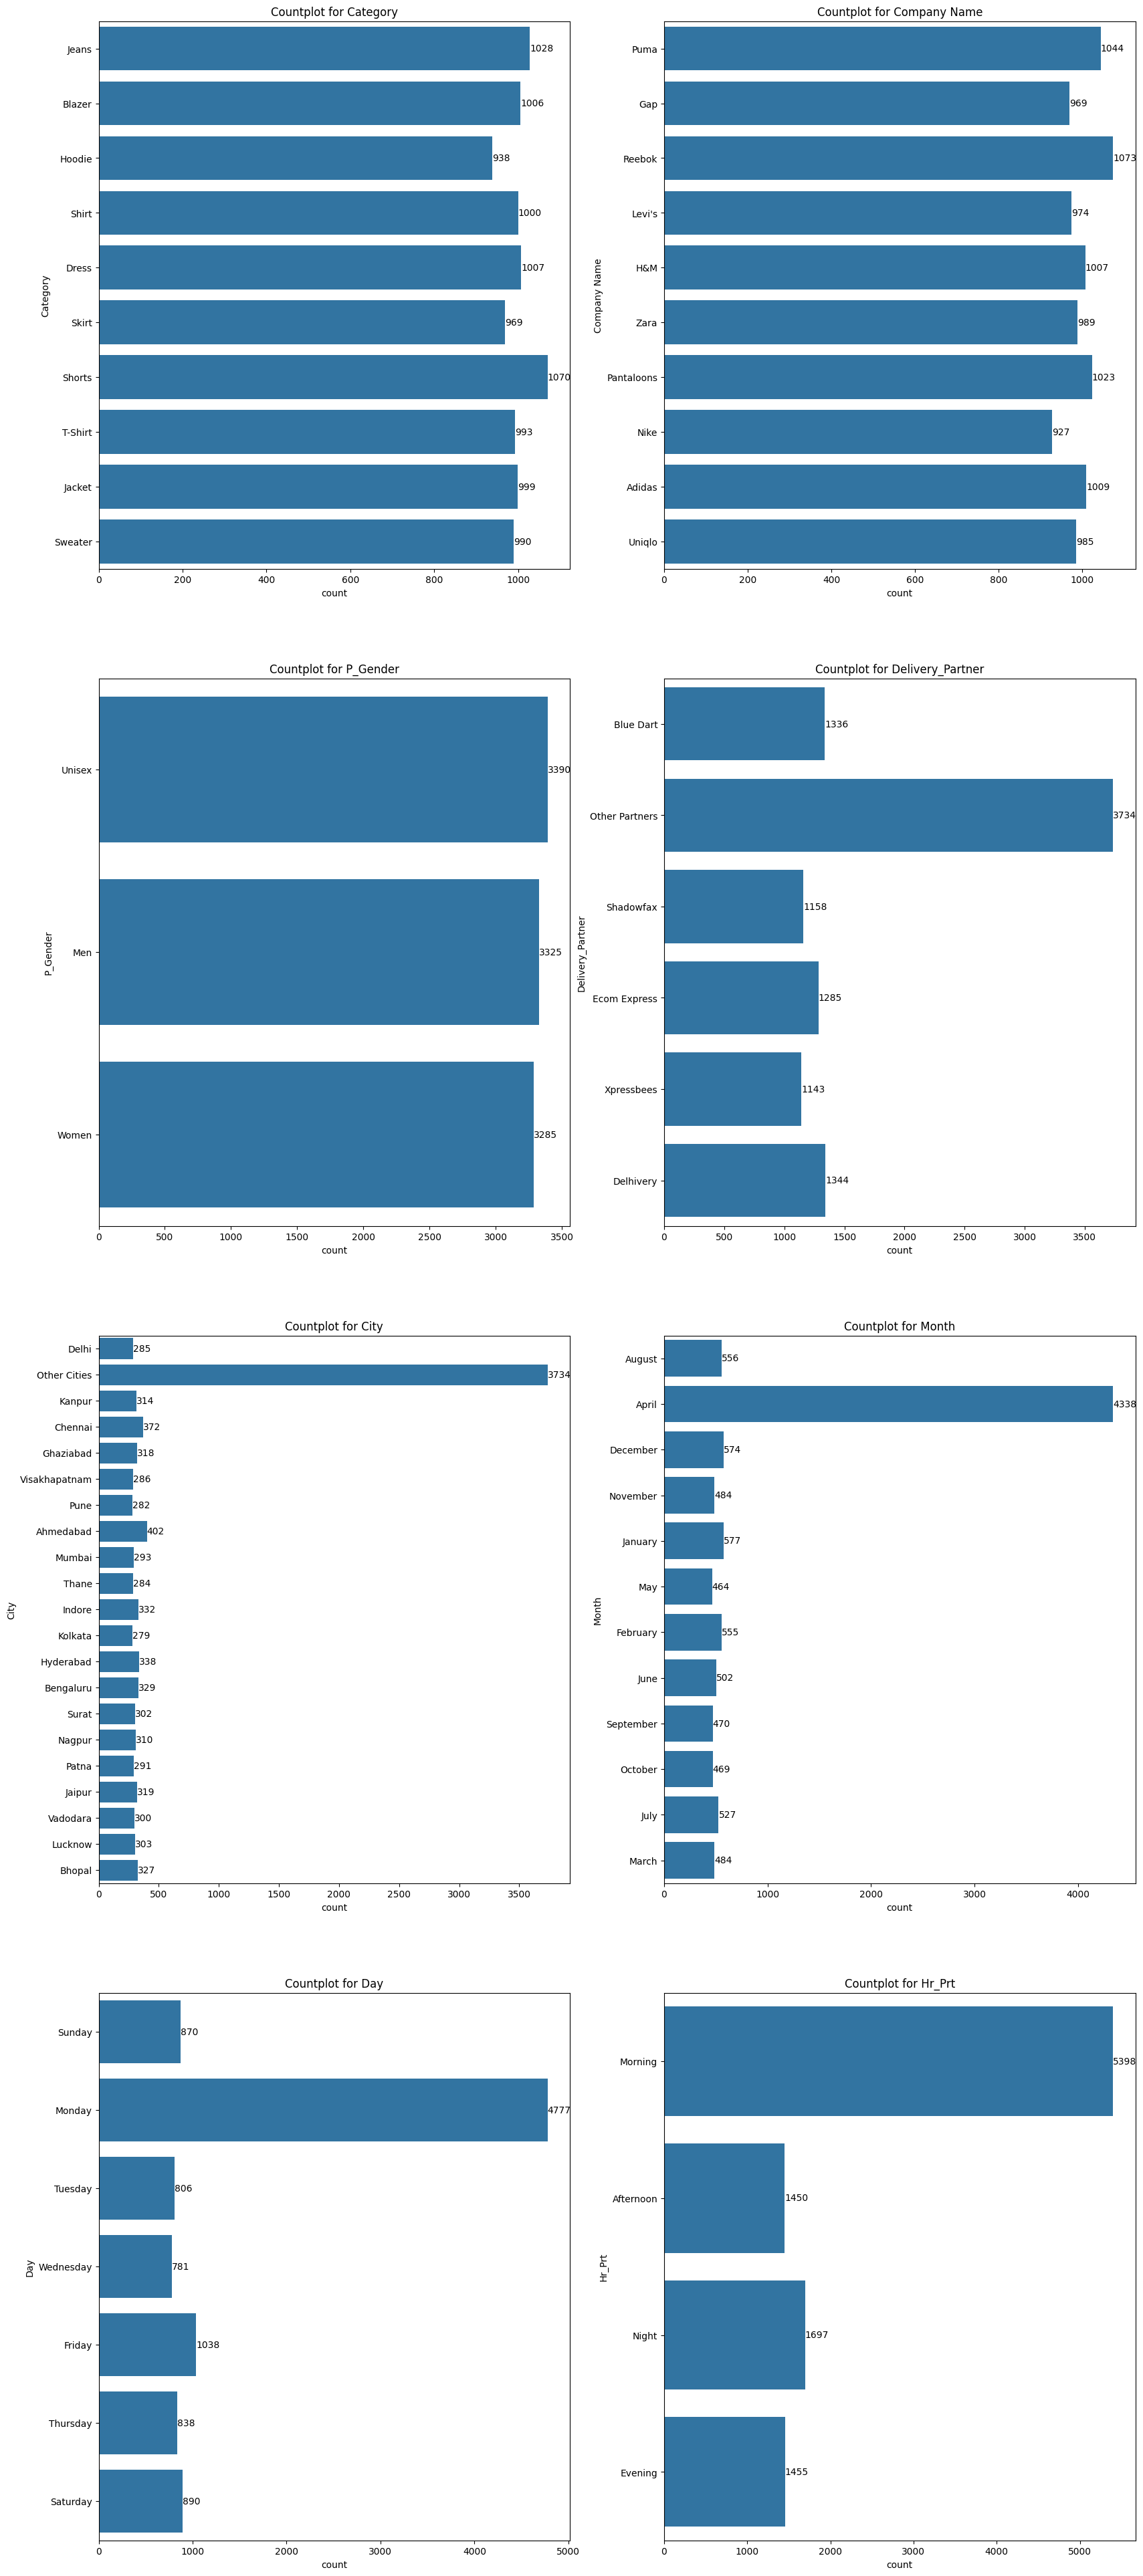

In [208]:
plt.figure(figsize=(20,100))

for i in range(len(cat)):
  plt.subplot(len(cat),2,i+1)
  cx=sns.countplot(df_f[cat[i]])
  cx.bar_label(cx.containers[0])
  plt.title(f'Countplot for {cat[i]}')

### Bivariate - Cat-Cont

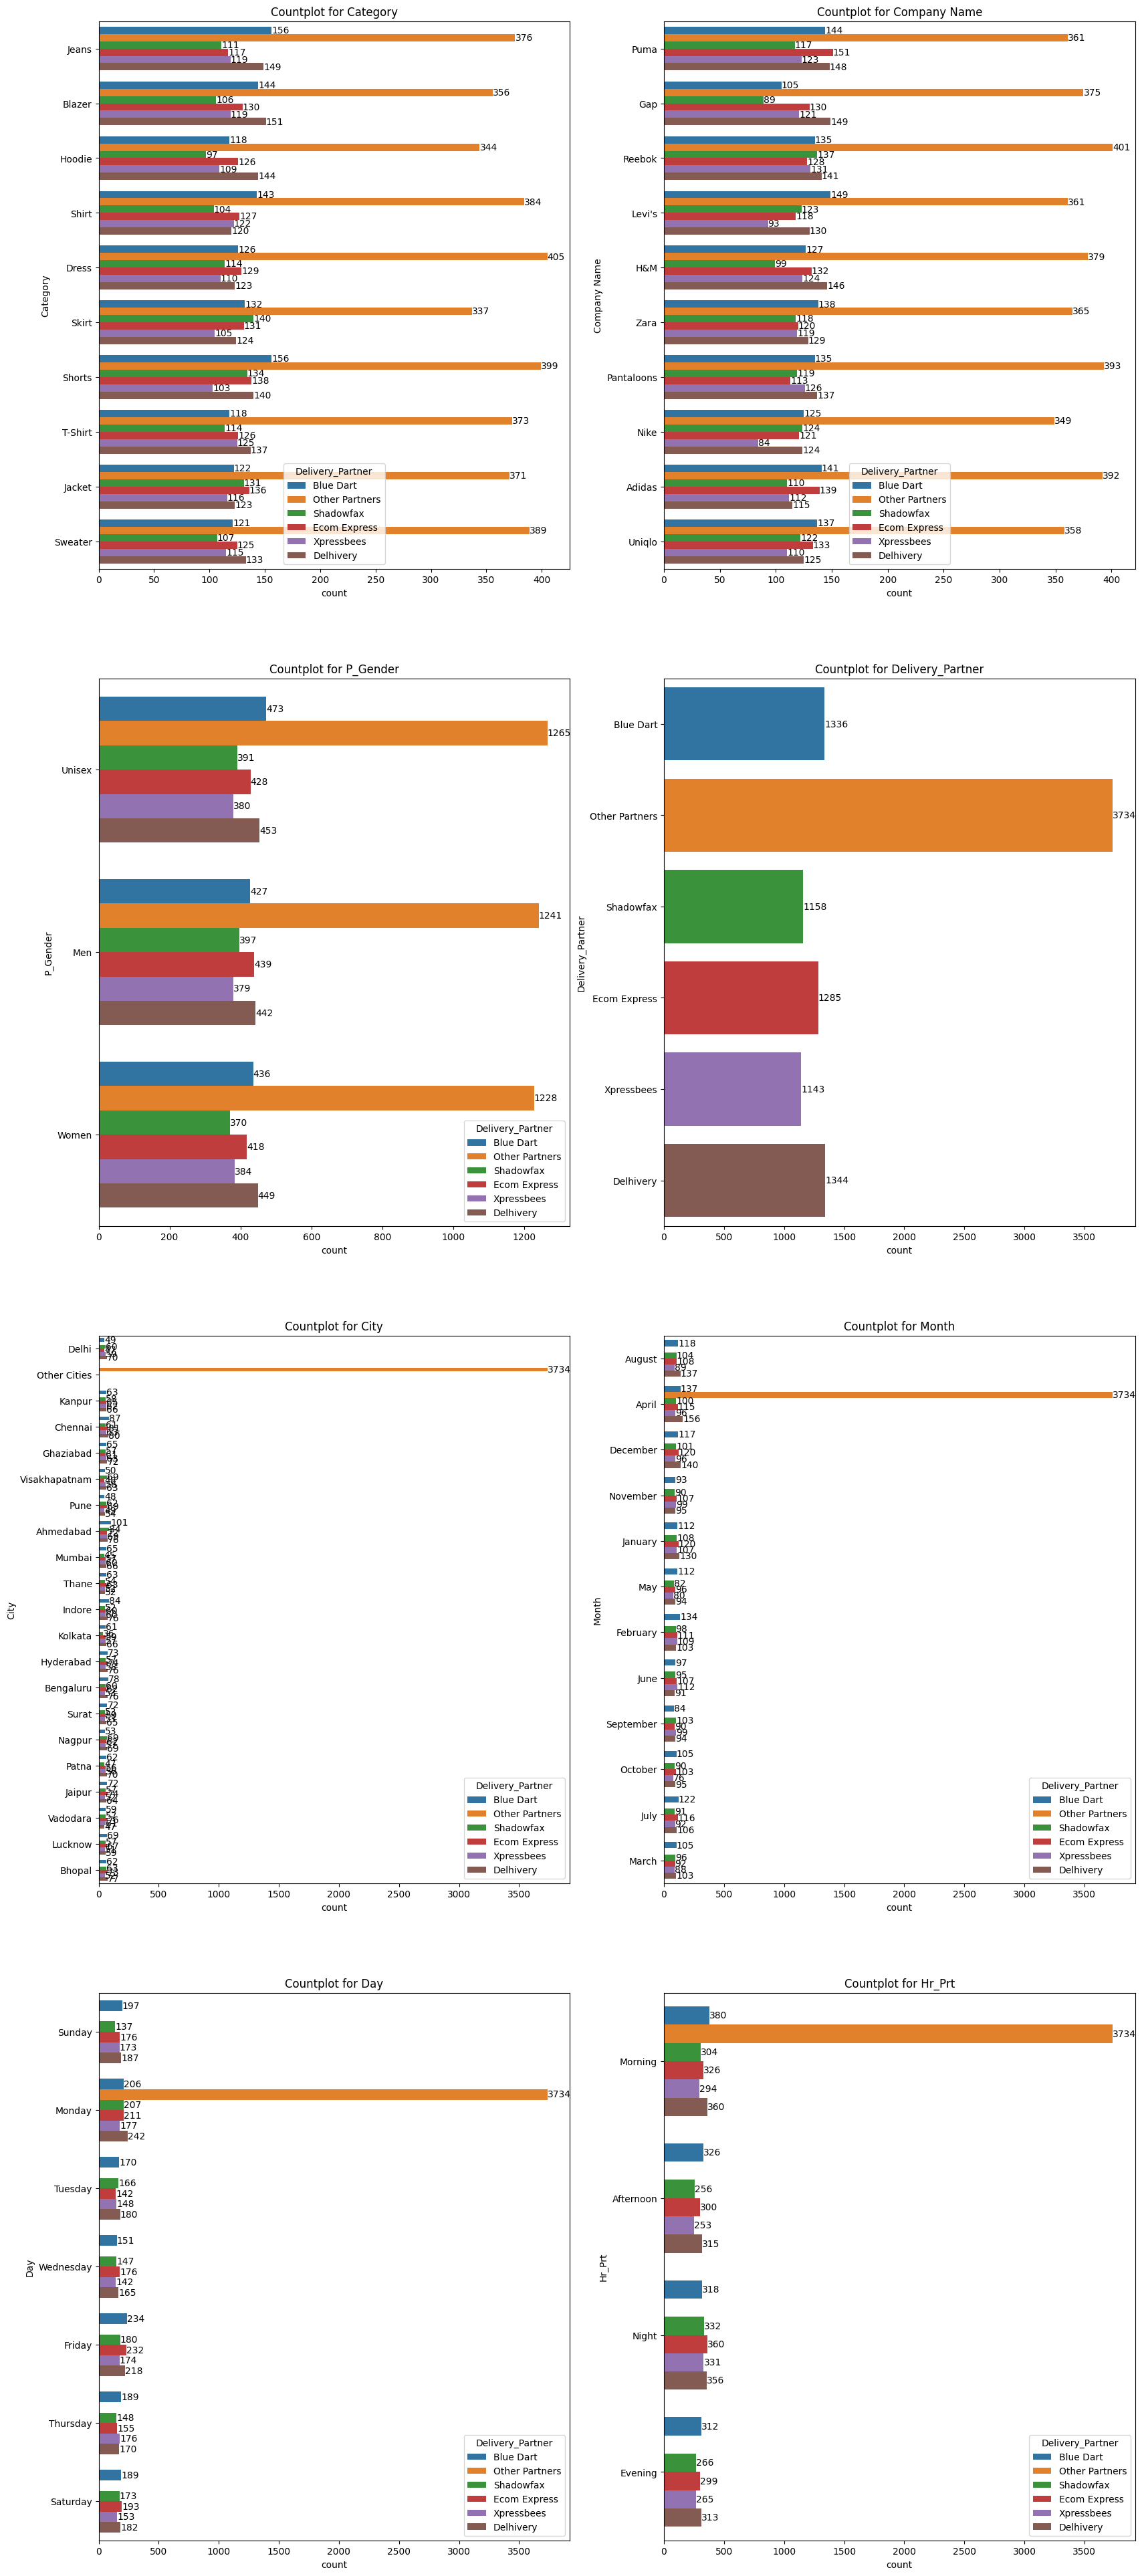

In [209]:
plt.figure(figsize=(20,100))

for i in range(len(cat)):
  plt.subplot(len(cat),2,i+1)
  cx=sns.countplot(y=df[cat[i]],hue=df['Delivery_Partner'])
  for j in cx.containers:
    cx.bar_label(j)
  plt.title(f'Countplot for {cat[i]}')

### Colinearity

<Axes: >

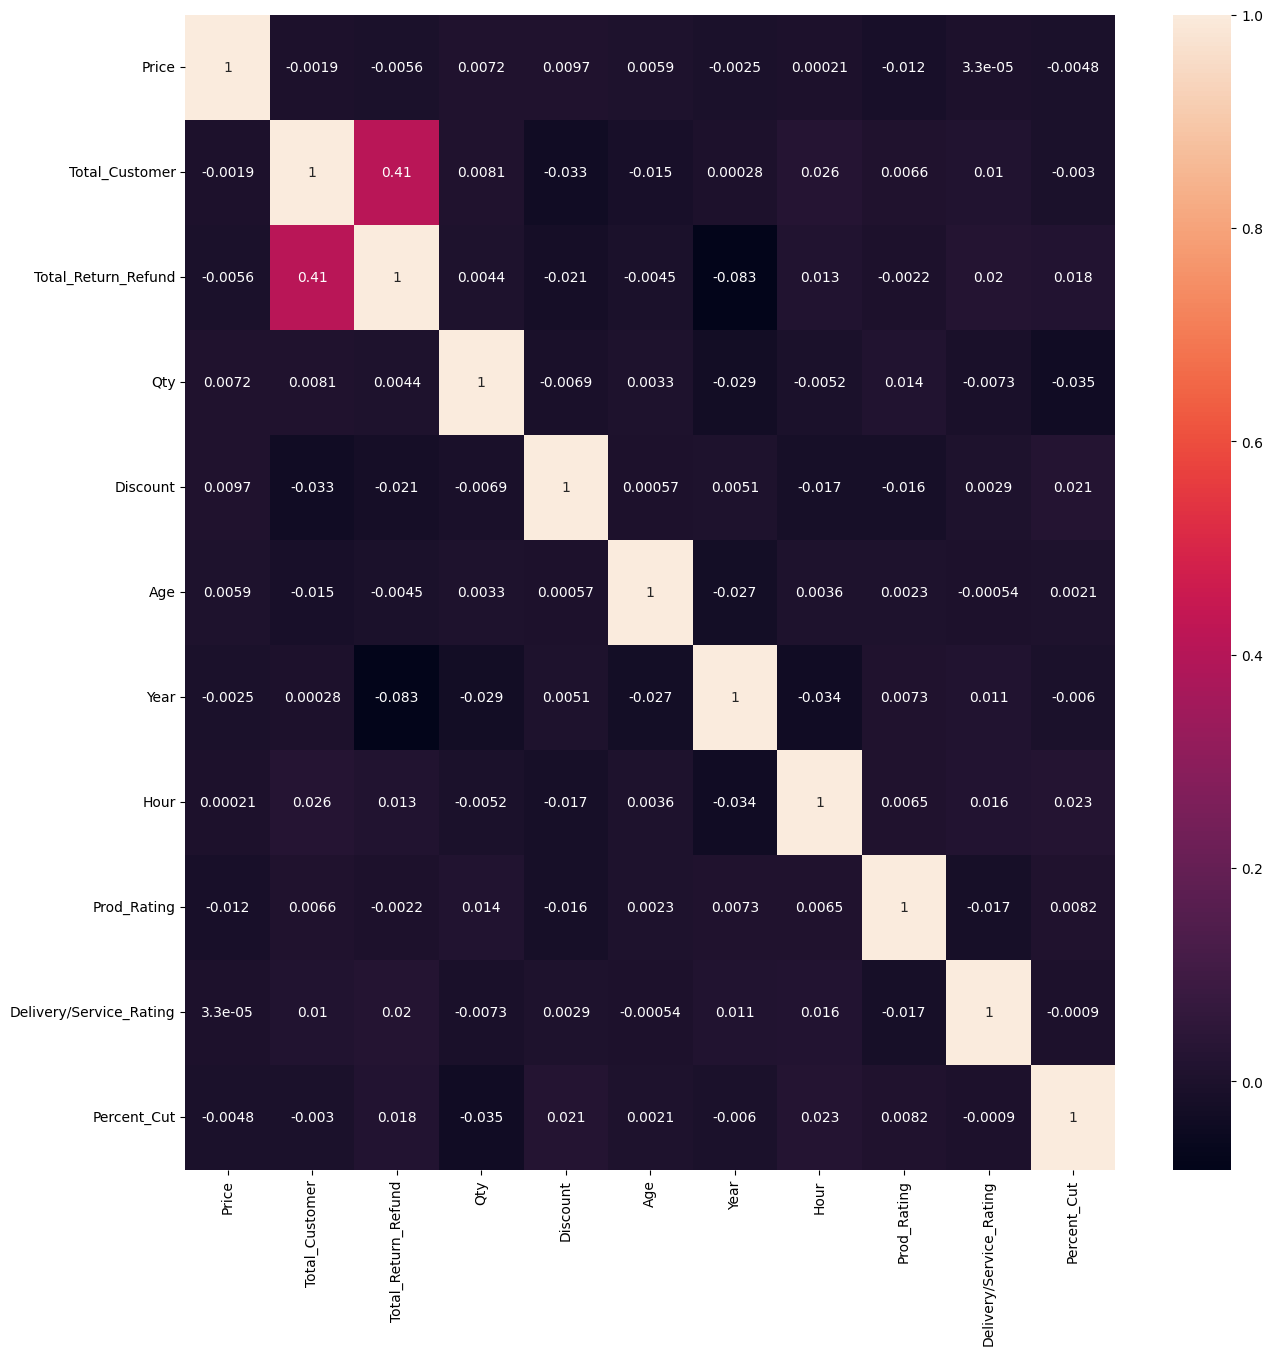

In [210]:
crr=df[cont].corr()

plt.figure(figsize=(15,15))
sns.heatmap(crr,annot=True)

## Outliers

In [211]:
df_f.describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T.iloc[:,3:]

,min,1%,2%,5%,50%,95%,98%,99%,max
Total_Customer,1.0,1.0000,1.0000,1.0000,3.00,7.0000,9.0000,11.0000,24.00
Total_Return_Refund,0.0,0.0000,0.0000,0.0000,1.00,2.0000,4.0000,6.0000,24.00
Price,10.0,14.3798,18.3188,31.8285,253.63,474.3125,490.3102,495.0207,499.97
Qty,1.0,1.0000,1.0000,1.0000,6.00,10.0000,10.0000,10.0000,10.00
Discount,0.0,0.0000,0.0000,0.0000,9.00,25.0000,40.0000,40.0500,50.00
Age,18.0,19.0000,20.0000,22.0000,44.00,65.0000,68.0000,69.0000,70.00
Year,2023.0,2023.0000,2023.0000,2023.0000,2023.00,2024.0000,2024.0000,2024.0000,2024.00
Hour,0.0,0.0000,0.0000,2.0000,12.00,21.0000,23.0000,23.0000,23.00
Prod_Rating,1.0,1.0000,1.0000,1.0000,2.99,5.0000,5.0000,5.0000,5.00
Delivery/Service_Rating,1.0,1.0000,1.0000,1.0000,3.02,5.0000,5.0000,5.0000,5.00


In [212]:
for i in cont:
  q1=np.percentile(df_f[i],25)
  q3=np.percentile(df_f[i],75)
  iqr=q3-q1
  up=q3+1.5*iqr
  lw=q1-1.5*iqr
  df_f[i]=np.where(df_f[i]>up,up,df_f[i])
  df_f[i]=np.where(df_f[i]<lw,lw,df_f[i])

In [213]:
df_f.describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T.iloc[:,3:]

,min,1%,2%,5%,50%,95%,98%,99%,max
Total_Customer,1.000,1.0000,1.0000,1.0000,3.00,4.5000,4.5000,4.5000,4.500
Total_Return_Refund,0.000,0.0000,0.0000,0.0000,1.00,2.0000,2.5000,2.5000,2.500
Price,10.000,14.3798,18.3188,31.8285,253.63,474.3125,490.3102,495.0207,499.970
Qty,3.500,3.5000,3.5000,3.5000,6.00,7.5000,7.5000,7.5000,7.500
Discount,0.000,0.0000,0.0000,0.0000,9.00,25.0000,25.0000,25.0000,25.000
Age,25.500,25.5000,25.5000,25.5000,44.00,61.5000,61.5000,61.5000,61.500
Year,2023.000,2023.0000,2023.0000,2023.0000,2023.00,2024.0000,2024.0000,2024.0000,2024.000
Hour,1.500,1.5000,1.5000,2.0000,12.00,21.0000,21.5000,21.5000,21.500
Prod_Rating,2.975,2.9750,2.9750,2.9750,2.99,3.0150,3.0150,3.0150,3.015
Delivery/Service_Rating,2.970,2.9700,2.9700,2.9700,3.02,3.0500,3.0500,3.0500,3.050


## Encoding

In [214]:
from sklearn.preprocessing import LabelEncoder

In [215]:
df_f.drop(['P_ID','P_Name'],inplace=True,axis=1 )

In [216]:
ct_enc= df_f.dtypes[df_f.dtypes=='object'].index.tolist()
for i in ct_enc:
  print(i,":",df_f[i].nunique() )

Category : 10
Company Name : 10
P_Gender : 3
Month : 12
Day : 7
City : 21
Hr_Prt : 4
Delivery_Partner : 6


In [217]:
cl_le=['Category','Company Name','Month','City','Delivery_Partner','P_Gender','Day','Hr_Prt']
le=LabelEncoder()
for i in cl_le:
  df_f[i]=le.fit_transform(df_f[i])

In [218]:
df_dm=df_f.copy()

## Select x and y

In [219]:
x=df_dm.drop('Delivery_Partner',axis=1)
y=df_dm['Delivery_Partner']

## Train Test Split

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

## Standard Scaling

In [222]:
from sklearn.preprocessing import StandardScaler

In [223]:
ss=StandardScaler()

In [224]:
xtrain_sm= pd.DataFrame(data=ss.fit_transform(xtrain) , columns=xtrain.columns)
xtest_sm= pd.DataFrame(data=ss.transform(xtest) , columns=xtest.columns)

In [225]:
print(xtrain_sm.shape)
print(xtest_sm.shape)

(7000, 18)
(3000, 18)


## Target Variale Transformation

In [226]:
from imblearn.combine import SMOTETomek

In [227]:
smo=SMOTETomek(random_state=50)
xtrain_s,ytrain_s=smo.fit_resample(xtrain_sm,ytrain)

In [228]:
ytrain_s.value_counts()

,count
Delivery_Partner,
4,2642
3,2642
0,2642
5,2641
1,2641
2,2640


## Evaluation matrix

In [229]:
def eval_score(mdl,xtrain,ytrain,xtest,ytest):
  print('Train Score:',mdl.score(xtrain,ytrain))
  print('Test Score:',mdl.score(xtest,ytest))

In [230]:
def eval_metrics(ytest,ypred):
  print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
  print('Classification Report:\n',classification_report(ytest,ypred))

## Model Building

### Decision Tree

In [231]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
## Hyperparameter Tuning

In [233]:
dt=DecisionTreeClassifier()

In [234]:
max_depth=[8,9,10,11,12,13,14]
min_samples_split=[9,10,11,12,13,14,15]
criterion=['gini','entropy']

In [235]:
prd_dt=list(product(max_depth,min_samples_split,criterion))

In [236]:
md_dt=[]
mss_dt=[]
cr_dt=[]
tr_dt=[]
ts_dt=[]

for i,j,k in prd_dt:
  dt=DecisionTreeClassifier(max_depth=i,min_samples_split=j,criterion=k)
  dt.fit(xtrain_s,ytrain_s)
  md_dt.append(i)
  mss_dt.append(j)
  cr_dt.append(k)
  tr_dt.append(dt.score(xtrain_s,ytrain_s))
  ts_dt.append(dt.score(xtest_sm,ytest))

hp_dt=pd.DataFrame({'Max_Depth':md_dt,'Min_Samples_Split':mss_dt,'Criterion':cr_dt,'Train_Score':tr_dt,'Test_Score':ts_dt })

In [237]:
hp_dt['Score_diff']=hp_dt['Train_Score']-hp_dt['Test_Score']

In [238]:
bp_dt= hp_dt.sort_values(by='Score_diff',ascending=True).head(1)

dt_md=bp_dt['Max_Depth'].values[0]
dt_mss=bp_dt['Min_Samples_Split'].values[0]
dt_cr=bp_dt['Criterion'].values[0]

bp_dt

,Max_Depth,Min_Samples_Split,Criterion,Train_Score,Test_Score,Score_diff
12,8,15,gini,0.738011,0.699667,0.038344


In [239]:
## Using best parameter

In [240]:
dt_f=DecisionTreeClassifier(max_depth=dt_md,min_samples_split=dt_mss,criterion=dt_cr)
dt_f.fit(xtrain_s,ytrain_s)

DecisionTreeClassifier(max_depth=np.int64(8), min_samples_split=np.int64(15))

In [241]:
dt_pred=dt_f.predict(xtest_sm)
eval_metrics(ytest,dt_pred)

Confusion Matrix:
 [[ 218  169   14    1    0   26]
 [ 202  157   13    0    0   17]
 [   5   15  108    2   33  244]
 [   0    0    0 1092    0    0]
 [   0    0   18    0  306    8]
 [   6   22   91    0   15  218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51       428
           1       0.43      0.40      0.42       389
           2       0.44      0.27      0.33       407
           3       1.00      1.00      1.00      1092
           4       0.86      0.92      0.89       332
           5       0.42      0.62      0.50       352

    accuracy                           0.70      3000
   macro avg       0.61      0.62      0.61      3000
weighted avg       0.70      0.70      0.69      3000



In [242]:
eval_score(dt_f,xtrain_s,ytrain_s,xtest_sm,ytest)

Train Score: 0.7380111055022716
Test Score: 0.6996666666666667


### Random Forest

In [243]:
from sklearn.ensemble import RandomForestClassifier

In [244]:
## Hyperparameter Tuning

In [245]:
n_estimator=[80,90,110]
max_depth=[8,9,10,11,12,13,14]
min_samples_split=[9,10,11,12,13,14,15]
criterion=['gini','entropy']

In [246]:
prd_rf=list(product(n_estimator,max_depth,min_samples_split,criterion))

In [247]:
ns_rf=[]
md_rf=[]
mss_rf=[]
cr_rf=[]
tr_rf=[]
ts_rf=[]

for i,j,k,l in prd_rf:
  dt=RandomForestClassifier(n_estimators=i,max_depth=j,min_samples_split=k,criterion=l)
  dt.fit(xtrain_s,ytrain_s)
  ns_rf.append(i)
  md_rf.append(j)
  mss_rf.append(k)
  cr_rf.append(l)
  tr_rf.append(dt.score(xtrain_s,ytrain_s))
  ts_rf.append(dt.score(xtest_sm,ytest))

hp_rf=pd.DataFrame({'N_Estimator':ns_rf,'Max_Depth':md_rf,'Min_Samples_Split':mss_rf,'Criterion':cr_rf,'Train_Score':tr_rf,'Test_Score':ts_rf})

In [248]:
hp_rf['Score_diff']=hp_rf['Train_Score']-hp_rf['Test_Score']

In [249]:
bp_rf= hp_rf.sort_values(by='Score_diff',ascending=True).head(1)

rf_es=bp_rf['N_Estimator'].values[0]
rf_md=bp_rf['Max_Depth'].values[0]
rf_mss=bp_rf['Min_Samples_Split'].values[0]
rf_cr=bp_rf['Criterion'].values[0]

bp_rf

,N_Estimator,Max_Depth,Min_Samples_Split,Criterion,Train_Score,Test_Score,Score_diff
6,80,8,12,gini,0.888188,0.722333,0.165854


In [250]:
## Using best parameter

In [251]:
rf_f=RandomForestClassifier(n_estimators=rf_es,min_samples_split=rf_mss , max_depth=rf_md , criterion=rf_cr )
rf_f.fit(xtrain_s,ytrain_s)

RandomForestClassifier(max_depth=np.int64(8), min_samples_split=np.int64(12),
                       n_estimators=np.int64(80))

In [252]:
eval_metrics(ytest,rf_f.predict(xtest_sm))

Confusion Matrix:
 [[ 180  219   19    0    0   10]
 [ 175  190   14    0    0   10]
 [  11   16  188    0   30  162]
 [   0    0    0 1092    0    0]
 [   0    0   12    0  312    8]
 [  11   14  141    0    7  179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.42      0.45       428
           1       0.43      0.49      0.46       389
           2       0.50      0.46      0.48       407
           3       1.00      1.00      1.00      1092
           4       0.89      0.94      0.92       332
           5       0.49      0.51      0.50       352

    accuracy                           0.71      3000
   macro avg       0.63      0.64      0.63      3000
weighted avg       0.71      0.71      0.71      3000



In [253]:
eval_score(rf_f,xtrain_s,ytrain_s,xtest_sm,ytest)

Train Score: 0.8849066128218072
Test Score: 0.7136666666666667


### KNeighbour Classifier

In [254]:
from sklearn.neighbors import KNeighborsClassifier

In [255]:
# Hyperparameter Tuning

In [256]:
n_neighbors=list(range(21,53,2))

In [257]:
n_kn=[]
tr_kn=[]
ts_kn=[]

for i in n_neighbors:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain_s,ytrain_s)
  n_kn.append(i)
  tr_kn.append(knn.score(xtrain_s,ytrain_s))
  ts_kn.append(knn.score(xtest_sm,ytest))

hp_kn=pd.DataFrame({'N_Neighbours':n_kn,'Train_Score':tr_kn,'Test_Score':ts_kn})

In [258]:
hp_kn['Score_diff']=hp_kn['Train_Score']-hp_kn['Test_Score']

In [259]:
bp_kn= hp_kn.sort_values(by='Score_diff',ascending=True).head(1)

kn_es=bp_kn['N_Neighbours'].values[0]
bp_kn

,N_Neighbours,Train_Score,Test_Score,Score_diff
15,51,0.715989,0.656,0.059989


In [260]:
# Using best parameter

In [261]:
kn_f=KNeighborsClassifier(n_neighbors=kn_es)
kn_f.fit(xtrain_s,ytrain_s)

KNeighborsClassifier(n_neighbors=np.int64(51))

In [262]:
eval_metrics(ytest,kn_f.predict(xtest_sm))

Confusion Matrix:
 [[ 193  166   28   11    2   28]
 [ 153  167   27   14    3   25]
 [  24   11  156   15   47  154]
 [   0    0    0 1092    0    0]
 [   1    1   64   11  211   44]
 [  17   10  130    8   38  149]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.47       428
           1       0.47      0.43      0.45       389
           2       0.39      0.38      0.38       407
           3       0.95      1.00      0.97      1092
           4       0.70      0.64      0.67       332
           5       0.37      0.42      0.40       352

    accuracy                           0.66      3000
   macro avg       0.56      0.55      0.56      3000
weighted avg       0.65      0.66      0.65      3000



In [263]:
eval_score(kn_f,xtrain_s,ytrain_s,xtest_sm,ytest)

Train Score: 0.7159893992932862
Test Score: 0.656


### Adaboost

In [264]:
from sklearn.ensemble import AdaBoostClassifier

In [265]:
# Hyperparameter Tuning

In [266]:
n_estimators=list(range(150,310,10))

In [267]:
n_ad=[]
tr_ad=[]
ts_ad=[]

for i in n_estimators:
  ada=AdaBoostClassifier(n_estimators=i)
  ada.fit(xtrain_s,ytrain_s)
  n_ad.append(i)
  tr_ad.append(ada.score(xtrain_s,ytrain_s))
  ts_ad.append(ada.score(xtest_sm,ytest))

hp_ad=pd.DataFrame({'N_Estimator':n_ad,'Train_Score':tr_ad,'Test_Score':ts_ad})

In [268]:
hp_ad['Score_diff']=hp_ad['Train_Score']-hp_ad['Test_Score']

In [269]:
bp_ad= hp_ad.sort_values(by='Score_diff',ascending=True).head(1)

ad_es=bp_ad['N_Estimator'].values[0]
bp_ad

,N_Estimator,Train_Score,Test_Score,Score_diff
6,210,0.618816,0.686,-0.067184


In [270]:
# Using best parameter

In [271]:
ada_f=AdaBoostClassifier(n_estimators=ad_es)
ada_f.fit(xtrain_s,ytrain_s)

AdaBoostClassifier(n_estimators=np.int64(210))

In [272]:
eval_metrics(ytest,ada_f.predict(xtest_sm))

Confusion Matrix:
 [[ 211  188   22    1    0    6]
 [ 195  168   17    2    0    7]
 [  14   14  272    4   33   70]
 [   0    0    0 1092    0    0]
 [   0    0   82    0  248    2]
 [  19    8  241    5   12   67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.49      0.49       428
           1       0.44      0.43      0.44       389
           2       0.43      0.67      0.52       407
           3       0.99      1.00      0.99      1092
           4       0.85      0.75      0.79       332
           5       0.44      0.19      0.27       352

    accuracy                           0.69      3000
   macro avg       0.61      0.59      0.58      3000
weighted avg       0.69      0.69      0.68      3000



In [273]:
eval_score(ada_f,xtrain_s,ytrain_s,xtest_sm,ytest)

Train Score: 0.6188162544169611
Test Score: 0.686


### Gradient Boost

In [274]:
from sklearn.ensemble import GradientBoostingClassifier

In [275]:
# Hyperparameter Tuning

In [276]:
n_estimators_gb=list(range(80,200,10))

In [277]:
n_gb=[]
tr_gb=[]
ts_gb=[]

for i in n_estimators_gb:
  gb=GradientBoostingClassifier(n_estimators=i)
  gb.fit(xtrain_s,ytrain_s)
  n_gb.append(i)
  tr_gb.append(gb.score(xtrain_s,ytrain_s))
  ts_gb.append(gb.score(xtest_sm,ytest))

hp_gb=pd.DataFrame({'N_Estimator':n_gb,'Train_Score':tr_gb,'Test_Score':ts_gb})

In [278]:
hp_gb['Score_diff']=hp_gb['Train_Score']-hp_gb['Test_Score']

In [279]:
bp_gb= hp_gb.sort_values(by='Score_diff',ascending=True).head(1)

gb_es=bp_gb['N_Estimator'].values[0]
bp_gb

,N_Estimator,Train_Score,Test_Score,Score_diff
0,80,0.804392,0.709333,0.095058


In [280]:
# Using best parameter

In [281]:
gb_f=GradientBoostingClassifier(n_estimators=gb_es)
gb_f.fit(xtrain_s,ytrain_s)

GradientBoostingClassifier(n_estimators=np.int64(80))

In [282]:
eval_metrics(ytest,gb_f.predict(xtest_sm))

Confusion Matrix:
 [[ 192  204   20    0    0   12]
 [ 166  195   17    0    0   11]
 [   7   14  170    0   32  184]
 [   0    0    0 1092    0    0]
 [   0    0   25    0  301    6]
 [   5   13  149    0    7  178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.45      0.48       428
           1       0.46      0.50      0.48       389
           2       0.45      0.42      0.43       407
           3       1.00      1.00      1.00      1092
           4       0.89      0.91      0.90       332
           5       0.46      0.51      0.48       352

    accuracy                           0.71      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.71      0.71      0.71      3000



In [283]:
eval_score(gb_f,xtrain_s,ytrain_s,xtest_sm,ytest)

Train Score: 0.8043917213528521
Test Score: 0.7093333333333334


### XGBoost

In [284]:
from xgboost import XGBClassifier

In [285]:
# Hyperparameter Tuning

In [286]:
eta=np.arange(0.05, 0.4, 0.05)
gamma= np.arange(0, 2, 0.1)
reg_alpha=np.arange(0, 1.5, 0.1)

In [287]:
prd_xgb=list(product(eta,gamma,reg_alpha))

In [288]:
eta_v=[]
gamma_v=[]
reg_alpha_v=[]
tr_xgb=[]
ts_xgb=[]

for i,j,k in prd_xgb:
  xgb=XGBClassifier(eta=i,gamma=j,reg_alpha=k,eval_metric='mlogloss',objective='multi:softmax')
  xgb.fit(xtrain_s,ytrain_s)
  eta_v.append(i)
  gamma_v.append(j)
  reg_alpha_v.append(k)
  tr_xgb.append(xgb.score(xtrain_s,ytrain_s))
  ts_xgb.append(xgb.score(xtest_sm,ytest))

hp_xgb=pd.DataFrame({'Eta':eta_v,'Gamma':gamma_v,'Reg_Alpha':reg_alpha_v,'Train_Score':tr_xgb,'Test_Score':ts_xgb})

In [289]:
hp_xgb['Score_diff']=hp_xgb['Train_Score']-hp_xgb['Test_Score']

In [290]:
bp_xgb= hp_xgb.sort_values(by='Score_diff',ascending=True).head(1)

xgb_eta=bp_xgb['Eta'].values[0]
xgb_gamma=bp_xgb['Gamma'].values[0]
xgb_reg_alpha=bp_xgb['Reg_Alpha'].values[0]

bp_xgb

,Eta,Gamma,Reg_Alpha,Train_Score,Test_Score,Score_diff
2091,0.35,1.9,0.6,0.846227,0.721667,0.12456


In [291]:
# Using best parameter

In [292]:
xgb_f=XGBClassifier(eta=xgb_eta,gamma=xgb_gamma,reg_alpha=xgb_reg_alpha)
xgb_f.fit(xtrain_s,ytrain_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=np.float64(0.35000000000000003),
              eval_metric=None, feature_types=None,
              gamma=np.float64(1.9000000000000001), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [293]:
eval_metrics(ytest,xgb_f.predict(xtest_sm))

Confusion Matrix:
 [[ 205  190   22    0    0   11]
 [ 157  201   17    0    0   14]
 [   6   15  198    0   28  160]
 [   0    0    0 1092    0    0]
 [   0    0   29    0  296    7]
 [   8   13  150    0    8  173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.48      0.51       428
           1       0.48      0.52      0.50       389
           2       0.48      0.49      0.48       407
           3       1.00      1.00      1.00      1092
           4       0.89      0.89      0.89       332
           5       0.47      0.49      0.48       352

    accuracy                           0.72      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.72      0.72      0.72      3000



In [294]:
eval_score(xgb_f,xtrain_s,ytrain_s,xtest_sm,ytest)

Train Score: 0.8462266532054518
Test Score: 0.7216666666666667


## Model Evaluation (Accuracy Score)

In [295]:
acc_scr=pd.DataFrame()

In [296]:
acc_scr['Model Name']=['Decision Tree','Random Forest','KNN','AdaBoost','GradientBoost','XGBoost']
acc_scr['Train Score']=[dt_f.score(xtrain_s,ytrain_s),
                         rf_f.score(xtrain_s,ytrain_s),
                         kn_f.score(xtrain_s,ytrain_s),
                         ada_f.score(xtrain_s,ytrain_s),
                         gb_f.score(xtrain_s,ytrain_s),
                         xgb_f.score(xtrain_s,ytrain_s)]
acc_scr['Test Score']=[dt_f.score(xtest_sm,ytest),
                      rf_f.score(xtest_sm,ytest),
                      kn_f.score(xtest_sm,ytest),
                      ada_f.score(xtest_sm,ytest),
                      gb_f.score(xtest_sm,ytest),
                      xgb_f.score(xtest_sm,ytest)]

In [297]:
acc_scr['Score_diff']=acc_scr['Train Score']-acc_scr['Test Score']

In [298]:
acc_scr.sort_values(by='Test Score',ascending=False,inplace=True)
acc_scr

,Model Name,Train Score,Test Score,Score_diff
5,XGBoost,0.846227,0.721667,0.124560
1,Random Forest,0.884907,0.713667,0.171240
4,GradientBoost,0.804392,0.709333,0.095058
0,Decision Tree,0.738011,0.699667,0.038344
3,AdaBoost,0.618816,0.686000,-0.067184
2,KNN,0.715989,0.656000,0.059989


## Export model using pickle


In [299]:
import pickle

In [300]:
## Here we are using XGBoost as it is showing the best satisfying result

In [301]:
# XGBoost Forest
with open('XGBoost_model_Myntra_Prediction_Final_Model.pkl', 'wb') as file:
    pickle.dump(xgb_f, file)